In [210]:
import numpy as np
import scipy.stats as si
import scipy
import sympy as sy
import matplotlib.pyplot as plt
import pandas as pd
# import sympy.statistics as systats

In [40]:
def euro_opt(S, K, T, r, sigma, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result

In [52]:
euro_opt(27,27.25,6,0.065,0.0000000000001)

8.550200169925013

In [42]:
def vega(S, K, T, r, sigma):

    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = S * si.norm.cdf(d1, 0.0, 1.0) * np.sqrt(T)
    
    return vega

In [48]:
vega(27,27.25,6,0.065,.001)

66.1362230551458

In [75]:
black_scholes(-1,27,48.5,0.016,5,.65,0)

23.176669536768507

In [159]:
#-------------------------------------------------------------------------------
# Name:        Scenario Analysis Black Scholes
# Purpose:
#
# Author:      Jamie
#
# Created:     20/06/2012
# Copyright:   (c) Jamie 2012
# Licence:     <your licence>
#-------------------------------------------------------------------------------

from scipy import stats
import math

def black_scholes (cp, s, k, t, rf, v):
        """ Price an option using the Black-Scholes model.
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        cp: +1/-1 for call/put
        """

        d1 = (math.log(s/k)+(rf+0.5*math.pow(v,2))*t)/(v*math.sqrt(t))
        d2 = d1 - v*math.sqrt(t)

        optprice = (cp*s*math.exp(-div*t)*stats.norm.cdf(cp*d1)) - (cp*k*math.exp(-rf*t)*stats.norm.cdf(cp*d2))
        return optprice


23.176669536768507

In [124]:
def bissecao(f,a,b, p, tol=1e-8):
    # YOUR CODE HERE
    # p = [cp, s, k, t, v, rf, div, price]
    count = 0
    while b-a >= tol:
        count += 1
        z = (a+b)/2
        if f(p[0],p[1],p[2],p[3],z,p[5],p[6],p[7]) <= tol:
            return z, count
        if f(p[0],p[1],p[2],p[3],a,p[5],p[6],p[7])*f(p[0],p[1],p[2],p[3],z,p[5],p[6],p[7]) < 0:
            b = z
        else:
            a = z
    return z, count

In [138]:
def h(cp, s, k, t, v, rf, div, price):
    #  print(black_scholes(cp, s, k, t, v, rf, div) - price)
    return abs(black_scholes(cp, s, k, t, v, rf, div) - price)

In [139]:
bissecao(h,0.1,5,[-1,27,48.5,0.016,0.1,0.065,0,21.34])

0.26928565347123623
0.1095862197097155
0.26928565347123623
1.0132549214567277
0.26928565347123623
1.0132549214567277
1.581320063767489
1.0132549214567277
1.581320063767489
1.9006520304136956
1.581320063767489
1.9006520304136956
2.0676267546886606
1.9006520304136956
2.0676267546886606
2.1527723919917783
2.0676267546886606
2.1527723919917783
2.195739933640265
2.1527723919917783
2.195739933640265
2.2173199815349633
2.195739933640265
2.2173199815349633
2.2281337790224143
2.2173199815349633
2.2281337790224143
2.233546584478237
2.2281337790224143
2.233546584478237
2.236254459318289
2.233546584478237
2.236254459318289
2.2376087641967324
2.236254459318289
2.2376087641967324
2.2382860084294514
2.2376087641967324
2.2382860084294514
2.2386246534852816
2.2382860084294514
2.2386246534852816
2.2387939817469658
2.2386246534852816
2.2387939817469658
2.2388786473111004
2.2387939817469658
2.2388786473111004
2.2389209804514856
2.2388786473111004
2.2389209804514856
2.2389421471112456
2.2389209804514856
2.

(4.999999990873039, 29)

In [140]:
black_scholes(-1,27,32,0.0164,2.55,0.065,0)

6.801033221436356

-16.34372377748709


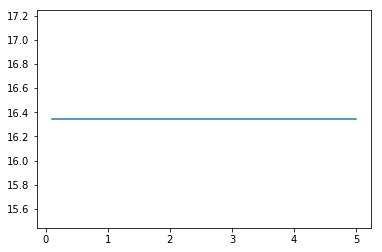

In [143]:
ts = np.linspace(0.1,5,200)
plt.plot(ts,[h(-1,27,32,0.0164,0.7,0.065,0,21.34)]*200)

In [169]:
black_scholes(-1,27,32,0.0164,0.065,0.715)

5.000239133333103

3900

In [219]:
cp = -1
s = 27
k = 32
t = 0.016
rf = 0.065
price = 5
def h(vol):
#   print(black_scholes(cp, s, k, t, vol, rf, div) - price)
    return black_scholes(cp, s, k, t, rf, vol) - price

scipy.optimize.bisect(h,1e-6,5,xtol=1e-16)

0.7199792850227894

In [222]:
cp = 1
s = 27
k = 26.25
t = 0.016
rf = 0.065
price = 1.04
def h(vol):
    return black_scholes(cp, s, k, t, rf, vol) - price
scipy.optimize.bisect(h,1e-6,5,xtol=1e-16)

0.4237032042981779

In [224]:
black_scholes(1, 27, 26.25, 0.016, 0.065, 0.42370)

1.0399962926697413

In [395]:
from scipy import stats
import math

def black_scholes (cp, s, k, t, rf, v):
        """ Price an option using the Black-Scholes model.
        s: initial stock price
        k: strike price
        t: expiration time
        v: volatility
        rf: risk-free rate
        cp: +1/-1 for call/put
        """

        d1 = (math.log(s/k)+(rf+0.5*math.pow(v,2))*t)/(v*math.sqrt(t))
        d2 = d1 - v*math.sqrt(t)

        optprice = (cp*s*math.exp(-div*t)*stats.norm.cdf(cp*d1)) - (cp*k*math.exp(-rf*t)*stats.norm.cdf(cp*d2))
        return optprice

def volat_impl(cp, s, k, t, rf, price):
    def h(vol):
        return black_scholes(cp, s, k, t, rf, vol) - price
    return scipy.optimize.bisect(h,1e-6,5,xtol=1e-16)

In [396]:
black_scholes(1,27,28,0.016,0.065,0.3914)

0.18993518619015592

In [425]:
data = pd.read_csv('BRFOODS.csv',';')
# data

In [426]:
'''
Setting CONSTANTS
'''

sigla_acao = 'BRFS3'
empresa = 'BRFoods S.A.'
preco_acao = 27.00
dias = [6,28]


puts = data['Tipo'] == 'PUT'
calls = data['Tipo'] == 'CALL'
dia1706 = data['TF'] == '17-06-2019'
dia1507 = data['TF'] == '15-07-2019'

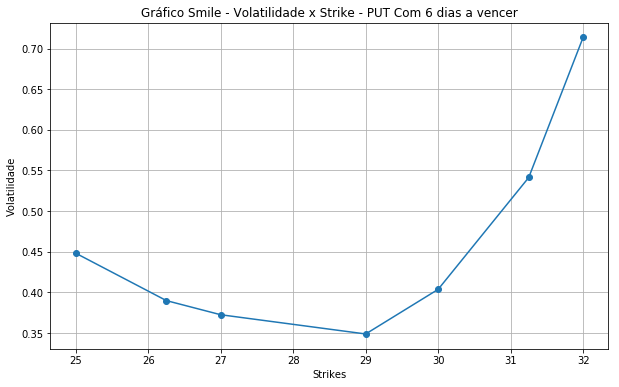

In [435]:
## PUT Com 6 dias a vencer

## Buscando as informações no DataFrame
df_k = data[puts & dia1706].iloc[0:,2:3]
df_s = data[puts & dia1706].iloc[0:,3:4]
ks = df_k.values.flatten()
Ss = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs = []
for (k,s) in zip(ks,Ss):
    vs.append(volat_impl(-1,preco_acao,k,dias[0]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks,vs, marker='o')
plt.xlabel('Strikes')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - PUT Com 6 dias a vencer')
plt.grid()
plt.show()

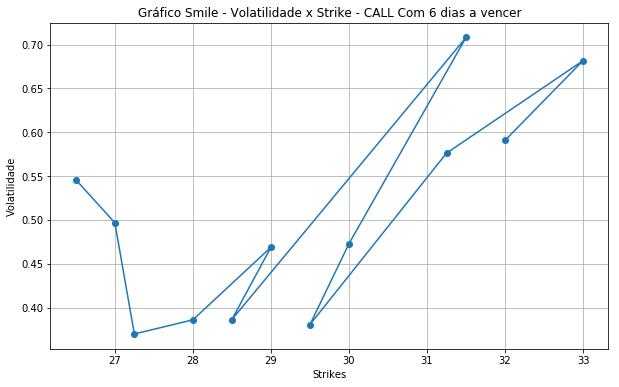

In [446]:
## CALL Com 6 dias a vencer

## Buscando as informações no DataFrame
df_k = data[calls & dia1706].iloc[0:,2:3]
df_s = data[calls & dia1706].iloc[0:,3:4]
ks = df_k.values.flatten()
Ss = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs = []
for (k,s) in zip(ks,Ss):
    vs.append(volat_impl(1,preco_acao,k,dias[0]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks,vs, marker='o')
plt.xlabel('Strikes')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - CALL Com 6 dias a vencer')
plt.grid()
plt.show()

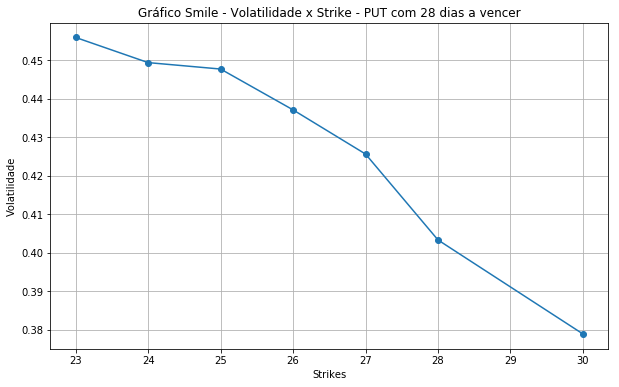

In [451]:
## PUT Com 28 dias a vencer

## Buscando as informações no DataFrame
df_k = data[puts & dia1507].iloc[0:,2:3]
df_s = data[puts & dia1507].iloc[0:,3:4]
ks = df_k.values.flatten()
Ss = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs = []
for (k,s) in zip(ks,Ss):
    vs.append(volat_impl(-1,preco_acao,k,dias[1]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks,vs, marker='o')
plt.xlabel('Strikes')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - PUT com 28 dias a vencer')
plt.grid()
plt.show()

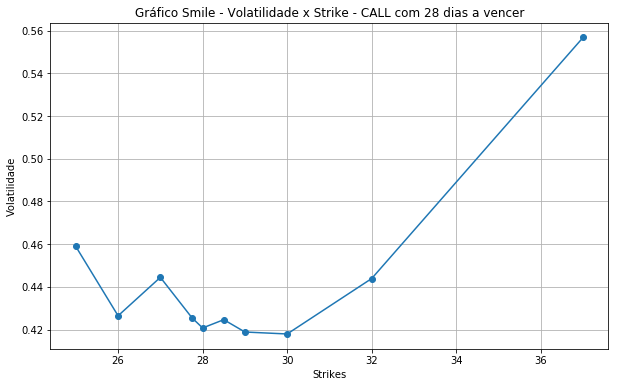

In [456]:
## CALL Com 28 dias a vencer

## Buscando as informações no DataFrame
df_k = data[calls & dia1507].iloc[0:,2:3]
df_s = data[calls & dia1507].iloc[0:,3:4]
ks = df_k.values.flatten()
Ss = df_s.values.flatten()

## Setando o array com as volatilidades a serem plotadas
vs = []
for (k,s) in zip(ks,Ss):
    vs.append(volat_impl(1,preco_acao,k,dias[1]/365,0.065,s))

## Plot do gráfico
plt.figure(figsize=(10,6))
plt.plot(ks,vs, marker='o')
plt.xlabel('Strikes')
plt.ylabel('Volatilidade')
plt.title('Gráfico Smile - Volatilidade x Strike - CALL com 28 dias a vencer')
plt.grid()
plt.show()